# Federated Learning Case Study

## 03. A baseline ML models for comparison

We construct 3 baseline models (Decision Tree, MLP, XGB) using the pre-computed feature sets, for use with the CICIDS dataset.

## 1. Load in the data

In [8]:
import os
import pandas as pd
import numpy as np

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

We now have our data in a typical ***X_train, X_test, y_train, y_test*** format, where we can then deploy centralised and decentralised ML models.

## 2. Centralised Machine Learning Models

### 2.1 Decision Tree Classifier

In [9]:
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

from sklearn.tree import DecisionTreeClassifier

In [10]:
%%time
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

Wall time: 5min 24s


DecisionTreeClassifier()

In [11]:
dt_score = dTree_clf.score(X_test, y_test)
print("Accuracy of Model::", dt_score)

Accuracy of Model:: 0.9995475985818406


In [12]:
dt_predictions = dTree_clf.predict(X_test)

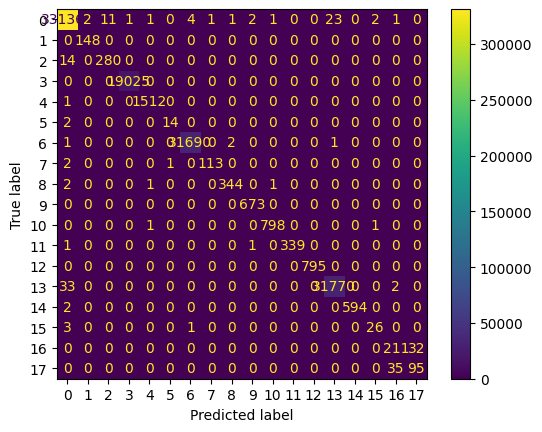

In [13]:
dt_predictions = dTree_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dTree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dTree_clf.classes_)
disp.plot()
plt.show()

In [14]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, dt_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, dt_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, dt_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, dt_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9637048518878645, 0.9578896671028466, 0.960709171978608, None)
Micro: (0.9995475985818406, 0.9995475985818406, 0.9995475985818406, None)
Weighted: (0.9995473317194454, 0.9995475985818406, 0.9995472275864155, None)
Per-label: (array([0.99981595, 0.98666667, 0.96219931, 0.99994744, 0.9980198 ,
       0.93333333, 0.99984225, 0.99122807, 0.99135447, 0.99556213,
       0.9975    , 1.        , 1.        , 0.99924514, 1.        ,
       0.89655172, 0.84738956, 0.7480315 ]), array([0.99984913, 1.        , 0.95238095, 1.        , 0.99933906,
       0.875     , 0.99987379, 0.97413793, 0.98850575, 1.        ,
       0.9975    , 0.9941349 , 1.        , 0.99889954, 0.9966443 ,
       0.86666667, 0.86831276, 0.73076923]), array([0.99983254, 0.99328859, 0.95726496, 0.99997372, 0.998679  ,
       0.90322581, 0.99985802, 0.9826087 , 0.98992806, 0.99777613,
       0.9975    , 0.99705882, 1.        , 0.99907231, 0.99831933,
       0.88135593, 0.85772358, 0.73929961]), array([331414,    148,    

### 2.2 Multi Layer Perceptron

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
%%time
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
mlp_score = mlp_clf.score(X_test, y_test)

Wall time: 21min 10s


In [17]:
print("Accuracy of MLP model:", mlp_score)

Accuracy of MLP model: 0.9944640352777864


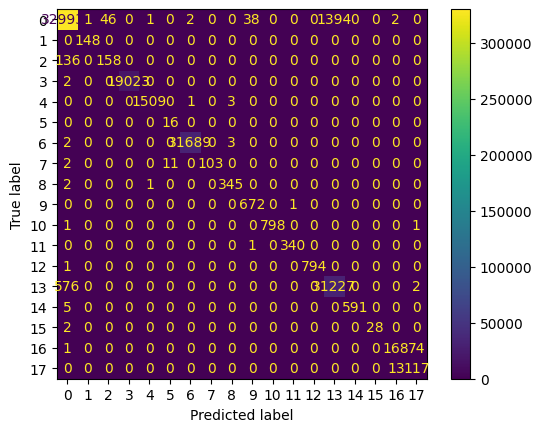

In [18]:
mlp_predictions = mlp_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [19]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, mlp_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, mlp_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, mlp_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, mlp_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9311265814499756, 0.9388496359016221, 0.9280860894290611, None)
Micro: (0.9944640352777864, 0.9944640352777864, 0.9944640352777864, None)
Weighted: (0.9945593172692917, 0.9944640352777864, 0.9944613572256384, None)
Per-label: (array([0.99779229, 0.99328859, 0.7745098 , 1.        , 0.99867637,
       0.59259259, 0.99990534, 1.        , 0.98290598, 0.94514768,
       1.        , 0.99706745, 1.        , 0.95726679, 1.        ,
       1.        , 0.91803279, 0.60309278]), array([0.99552222, 1.        , 0.53741497, 0.99989488, 0.99735625,
       1.        , 0.99984224, 0.88793103, 0.99137931, 0.99851412,
       0.9975    , 0.99706745, 0.99874214, 0.98182676, 0.99161074,
       0.93333333, 0.69135802, 0.9       ]), array([0.99665596, 0.996633  , 0.63453815, 0.99994743, 0.99801587,
       0.74418605, 0.99987379, 0.94063927, 0.98712446, 0.97109827,
       0.99874844, 0.99706745, 0.99937067, 0.96939124, 0.9957877 ,
       0.96551724, 0.78873239, 0.72222222]), array([331414,    148,   

In [20]:
print (len(mlp_clf.coefs_))
print (mlp_clf.coefs_[0].shape)
print (mlp_clf.coefs_[1].shape)
print (len(mlp_clf.intercepts_))
print (mlp_clf.intercepts_[0].shape)
print (mlp_clf.intercepts_[1].shape)
print (mlp_clf.n_layers_)
print (type(mlp_clf.coefs_[0]))

2
(79, 100)
(100, 18)
2
(100,)
(18,)
3
<class 'numpy.ndarray'>


### 2.3 Extreme Gradient Boosting

In [21]:
# https://www.geeksforgeeks.org/xgboost/
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

!pip install xgboost
import xgboost as xgb

In [22]:
%%time
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

In [ ]:
#predictions = xgb_classifier.predict(X_test)
#print("Accuracy of XGB Model::",accuracy_score(y_test,predictions))

xgb_score = xgb_classifier.score(X_test, y_test)
print("Accuracy of XGB model:", xgb_score)


Accuracy of XGB model: 0.9997600056193806


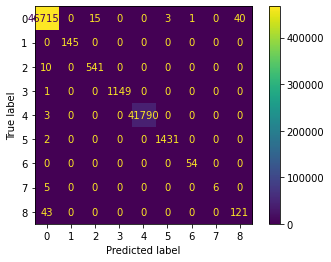

In [ ]:
xgb_predictions = xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, xgb_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, xgb_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, xgb_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, xgb_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9671292808626253, 0.9180719223241771, 0.9351548208377614, None)
Micro: (0.9997600056193806, 0.9997600056193806, 0.9997600056193806, None)
Weighted: (0.9997588554204544, 0.9997600056193806, 0.9997579444086362, None)
Per-label: (array([0.99986302, 1.        , 0.97302158, 1.        , 1.        ,
       0.99790795, 0.98181818, 1.        , 0.7515528 ]), array([0.99987372, 1.        , 0.98185118, 0.99913043, 0.99992822,
       0.99860433, 1.        , 0.54545455, 0.73780488]), array([0.99986837, 1.        , 0.97741644, 0.99956503, 0.99996411,
       0.99825602, 0.99082569, 0.70588235, 0.74461538]), array([467211,    145,    551,   1150,  41793,   1433,     54,     11,
          164], dtype=int64))


### 2.4 Results

DecisionTree and XBG perform best - DT much faster, XGB gets a higher accuracy.

In [ ]:
print (label.values)
print (label_n)
#label.value_counts()
print (np.unique(y_test))
print (np.unique(y_test, return_counts=True))

['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']
[0 0 0 ... 0 0 0]
[0 1 2 3 4 5 6 7 8]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([467211,    145,    551,   1150,  41793,   1433,     54,     11,
          164], dtype=int64))


In [ ]:
## Here we look at the number of instances across all classes, to determine what a naive BENIGN classifier would result in


counts = [567830, 489, 32006, 2573, 57531, 1375, 1449, 1984, 3, 9, 39701, 1474, 377, 5, 163]
counts[0] / np.sum(counts)

0.8031893901995703